In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np

# Path to the pickle file
filename = 'dataset.pkl'

df_tmp = None

# Attempt to load the dataset from the pickle file
try:
    if os.path.exists(filename):
        with open(filename, 'rb') as file:
            df_tmp = pickle.load(file)
        print(f"Dataset loaded from pickle file: {df_tmp.head()}")

except FileNotFoundError:
    print(f"File {filename} not found. Please ensure the file path is correct.")
except pickle.UnpicklingError:
    print("Error occurred while loading the pickle file. The file might be corrupted.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

# Attempt to load the Excel file into a DataFrame if df_tmp is still None
if df_tmp is None:
    try:
        df_tmp = pd.read_excel('H-1B_Disclosure_Data_FY2019.xlsx')
        # Save the dataset to a pickle file
        with open(filename, 'wb') as file:
            pickle.dump(df_tmp, file)
        print(f"Dataset saved to {filename}")
        print(df_tmp.head())

    except FileNotFoundError:
        print("The Excel file 'H-1B_Disclosure_Data_FY2019.xlsx' was not found. Please check the file path.")
    except pd.errors.ExcelFileError:
        print("There was an issue with reading the Excel file. It may be corrupt or in an unsupported format.")
    except Exception as e:
        print(f"An error occurred while processing the Excel file: {e}")


Dataset loaded from pickle file:           CASE_NUMBER CASE_STATUS CASE_SUBMITTED DECISION_DATE  \
0  I-200-16092-327771   WITHDRAWN     2016-04-08    2019-04-30   
1  I-203-17188-450729   WITHDRAWN     2017-07-14    2019-05-13   
2  I-203-17229-572307   WITHDRAWN     2017-08-23    2019-04-30   
3  I-203-17356-299648   WITHDRAWN     2017-12-22    2019-08-20   
4  I-203-18008-577576   WITHDRAWN     2018-01-10    2019-04-15   

  ORIGINAL_CERT_DATE      VISA_CLASS                    JOB_TITLE SOC_CODE  \
0                NaT            H-1B  ASSOCIATE CREATIVE DIRECTOR  11-2011   
1                NaT  E-3 Australian  ACCOUNT SUPERVISOR (MOTHER)  11-2011   
2                NaT  E-3 Australian  EXECUTIVE CREATIVE DIRECTOR  11-2011   
3                NaT  E-3 Australian      PROJECT MANAGEMENT LEAD  11-2011   
4                NaT  E-3 Australian        CREATIVE DIRECTOR, UX  11-2011   

                             SOC_TITLE FULL_TIME_POSITION  ...  \
0  ADVERTISING AND PROMOTIONS MANAG

In [53]:
df_tmp.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,PW_OTHER_SOURCE_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10,PW_SURVEY_NAME_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,MASTERS_EXEMPTION,PUBLIC_DISCLOSURE
0,I-200-16092-327771,WITHDRAWN,2016-04-08,2019-04-30,NaT,H-1B,ASSOCIATE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,NaN
1,I-203-17188-450729,WITHDRAWN,2017-07-14,2019-05-13,NaT,E-3 Australian,ACCOUNT SUPERVISOR (MOTHER),11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-203-17229-572307,WITHDRAWN,2017-08-23,2019-04-30,NaT,E-3 Australian,EXECUTIVE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-203-17356-299648,WITHDRAWN,2017-12-22,2019-08-20,NaT,E-3 Australian,PROJECT MANAGEMENT LEAD,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-203-18008-577576,WITHDRAWN,2018-01-10,2019-04-15,NaT,E-3 Australian,"CREATIVE DIRECTOR, UX",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df_tmp.shape

(664616, 260)

In [55]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664616 entries, 0 to 664615
Columns: 260 entries, CASE_NUMBER to PUBLIC_DISCLOSURE
dtypes: datetime64[ns](3), float64(81), int64(3), object(173)
memory usage: 1.3+ GB


61
Column stats saved in tabular form to column_stats.txt


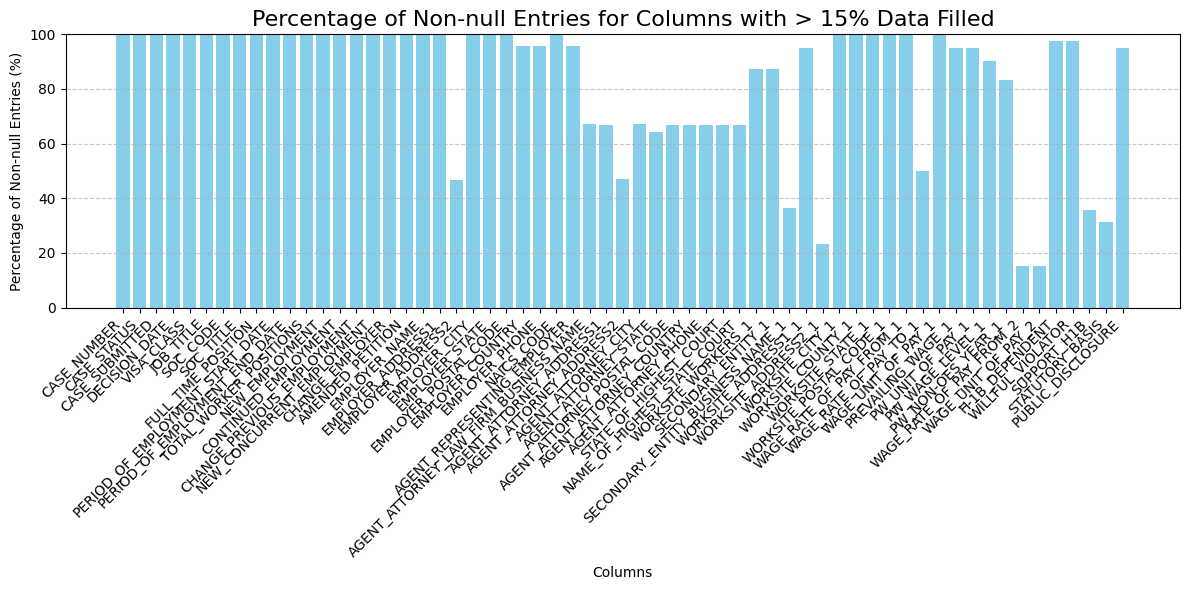

In [56]:
import pandas as pd


output_file = 'column_stats.txt'

try:
    # Calculate the number of non null entries and percentage for each column
    total_entries = len(df_tmp)
    column_stats = []

    for column in df_tmp.columns:
        non_null_count = df_tmp[column].notnull().sum()
        percentage = (non_null_count / total_entries) * 100
        column_stats.append((column, non_null_count, percentage))

    filtered_columns = [(col, count, percent) for col, count, percent in column_stats if percent > 15]

    print(len(filtered_columns))

    # Save the stats to a text file
    with open(output_file, 'w') as f:
        f.write(f"{'Column Name':<40}{'Non-null Entries':<20}{'Percentage':<10}\n")
        f.write(f"{'-'*60}\n")

        # Write the stats for each column
        for column, count, percent in column_stats:
            f.write(f"{column:<40}{count:<20}{percent:<10.2f}%\n")

    print(f"Column stats saved in tabular form to {output_file}")

    # unzip the data of columns where percent > 15
    columns, counts, percentages = zip(*filtered_columns)

    # Plotting the bar graph
    plt.figure(figsize=(12, 6))
    plt.bar(columns, percentages, color='skyblue')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Non-null Entries (%)')
    plt.title('Percentage of Non-null Entries for Columns with > 15% Data Filled', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 100)

    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Save the plot
    plt.tight_layout() 
    plt.savefig('non_null_percentage_plot.png')
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")


In [57]:
# Create a new DataFrame with filtered columns
columns_to_keep = [col for col, _, _ in filtered_columns]
new_df = df_tmp[columns_to_keep]

print(f"New DataFrame created with columns: {columns_to_keep}")

New DataFrame created with columns: ['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE', 'VISA_CLASS', 'JOB_TITLE', 'SOC_CODE', 'SOC_TITLE', 'FULL_TIME_POSITION', 'PERIOD_OF_EMPLOYMENT_START_DATE', 'PERIOD_OF_EMPLOYMENT_END_DATE', 'TOTAL_WORKER_POSITIONS', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'EMPLOYER_NAME', 'EMPLOYER_ADDRESS1', 'EMPLOYER_ADDRESS2', 'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE', 'EMPLOYER_COUNTRY', 'EMPLOYER_PHONE', 'NAICS_CODE', 'AGENT_REPRESENTING_EMPLOYER', 'AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME', 'AGENT_ATTORNEY_ADDRESS1', 'AGENT_ATTORNEY_ADDRESS2', 'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE', 'AGENT_ATTORNEY_POSTAL_CODE', 'AGENT_ATTORNEY_COUNTRY', 'AGENT_ATTORNEY_PHONE', 'STATE_OF_HIGHEST_COURT', 'NAME_OF_HIGHEST_STATE_COURT', 'WORKSITE_WORKERS_1', 'SECONDARY_ENTITY_1', 'SECONDARY_ENTITY_BUSINESS_NAME_1', 'WORKSITE_ADDRESS1_1', 'WORKSI

In [58]:
new_df.shape

(664616, 61)

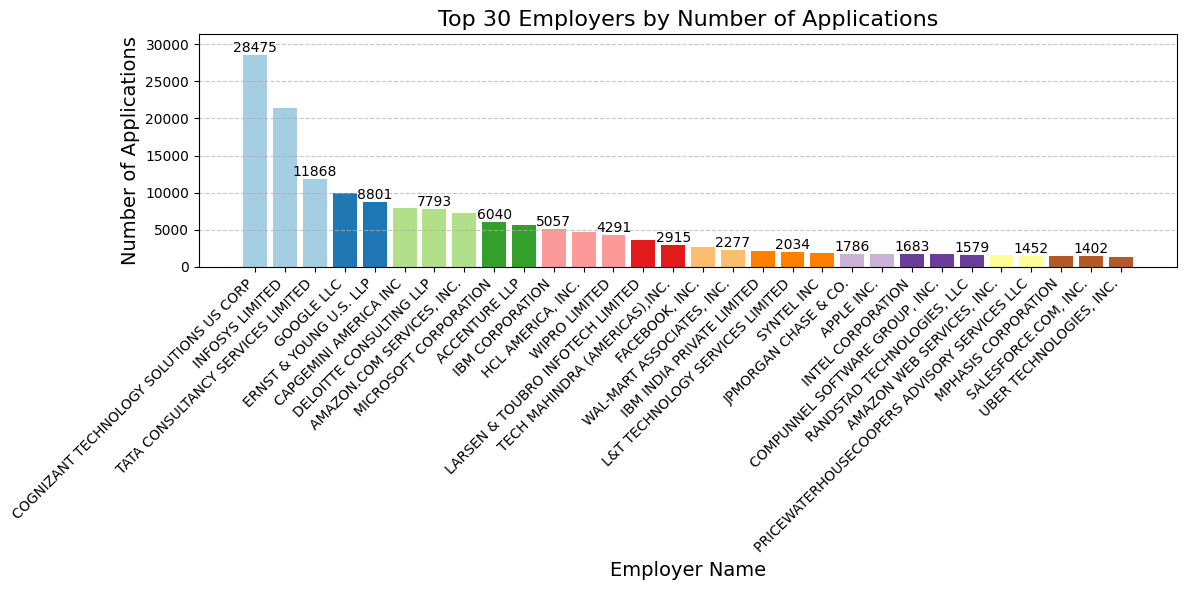

In [59]:


try:
    # Group by EMPLOYER_NAME and count the number of applications
    employer_counts = new_df['EMPLOYER_NAME'].value_counts()

    # top 30 employers
    top_employers = employer_counts.head(30)

    colors = plt.cm.Paired(np.linspace(0, 1, len(top_employers)))

    # Plotting the bar graph
    plt.figure(figsize=(12, 6))
    bars = plt.bar(top_employers.index, top_employers.values, color=colors)
    
    plt.xlabel('Employer Name', fontsize=14)
    plt.ylabel('Number of Applications', fontsize=14)
    plt.title('Top 30 Employers by Number of Applications', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, top_employers.max() * 1.1) 

    # Annotate alternate bar with the value
    count = 0
    for bar in bars:
        if count % 2 == 0:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')
        count += 1

    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Save the plot
    plt.tight_layout()  
    plt.savefig('top_employers_plot.png')  
    plt.show()  
except Exception as e:
    print(f"An error occurred while plotting: {e}")


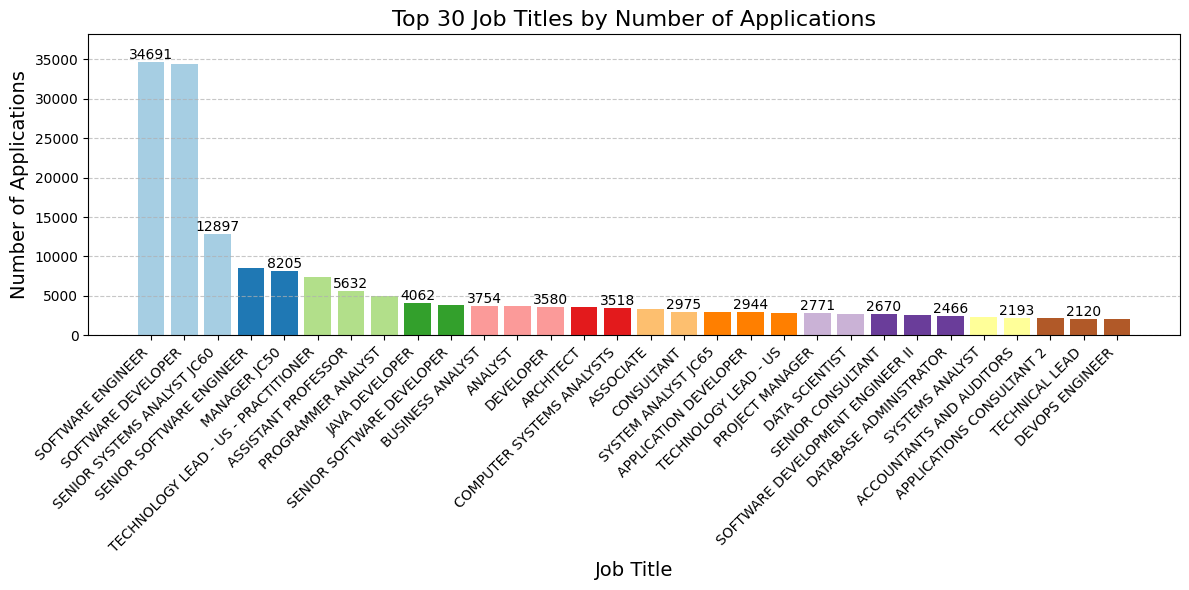

In [60]:


try:
    # Group by JOB_TITLE and count the number of applications
    job_counts = new_df['JOB_TITLE'].value_counts()

    # top 30 job titles
    top_jobs = job_counts.head(30)

    colors = plt.cm.Paired(np.linspace(0, 1, len(top_jobs)))

    # Plotting the bar graph
    plt.figure(figsize=(12, 6))
    bars = plt.bar(top_jobs.index, top_jobs.values, color=colors)

    plt.xlabel('Job Title', fontsize=14)
    plt.ylabel('Number of Applications', fontsize=14)
    plt.title('Top 30 Job Titles by Number of Applications', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, top_jobs.max() * 1.1) 

    count = 0
    for bar in bars:
        if count % 2 == 0:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')
        count+=1

   
    plt.grid(axis='y', linestyle='--', alpha=0.7)

  
    plt.tight_layout()  
    plt.savefig('top_job_titles_plot.png')  
    plt.show() 

except Exception as e:
    print(f"An error occurred while plotting: {e}")


In [61]:
# Count the number of null entries in the PREVAILING_WAGE_1 column
null_count = new_df['PREVAILING_WAGE_1'].isnull().sum()
print(f"Number of null entries in PREVAILING_WAGE_1: {null_count}")


Number of null entries in PREVAILING_WAGE_1: 33247


In [62]:
wage_counts = new_df['PREVAILING_WAGE_1'].value_counts()

print(wage_counts)

109242.00    8306
96366.00     7652
93538.00     5440
113318.00    5330
84240.00     3990
             ... 
55.96           1
55662.00        1
87165.00        1
122184.00       1
66543.00        1
Name: PREVAILING_WAGE_1, Length: 25706, dtype: int64


In [63]:
wage_df = new_df.copy()

wage_df.dropna(subset=['PREVAILING_WAGE_1'], inplace=True)

# Conversion rates to yearly wage
conversion_factors = {
    'Hour': 40 * 52,  # Assuming 40 hours per week, 52 weeks per year
    'Week': 52,       # 52 weeks in a year
    'Month': 12,      # 12 months in a year
    'Year': 1,       
    'Bi-Weekly': 26   # 26 bi-weekly periods in a year
}

# convert wages to yearly equivalent
def convert_to_yearly(row):
    unit = row['PW_UNIT_OF_PAY_1']
    wage = row['PREVAILING_WAGE_1']
    return wage * conversion_factors[unit]

# Apply the conversion
wage_df.loc[:, 'PREVAILING_WAGE_1'] = wage_df.apply(convert_to_yearly, axis=1)

# Update the corresponding 'PW_UNIT_OF_PAY_1' entries to 'Year'
wage_df.loc[wage_df['PW_UNIT_OF_PAY_1'] != 'Year', 'PW_UNIT_OF_PAY_1'] = 'Year'

In [64]:

# Filter the wage_df DataFrame for the top jobs
filtered_wage_df = wage_df[wage_df['JOB_TITLE'].isin(top_jobs.index)]

# Group by JOB_TITLE and calculate the mean wage
avg_wage_top_jobs = filtered_wage_df.groupby('JOB_TITLE')['PREVAILING_WAGE_1'].mean().reset_index()

avg_wage_top_jobs = avg_wage_top_jobs.sort_values(by='PREVAILING_WAGE_1', ascending=False)

# Display the result
print(avg_wage_top_jobs)


                              JOB_TITLE  PREVAILING_WAGE_1
19            SENIOR SOFTWARE DEVELOPER      144737.238273
20             SENIOR SOFTWARE ENGINEER      114679.926515
23     SOFTWARE DEVELOPMENT ENGINEER II      109572.818326
24                    SOFTWARE ENGINEER      109117.341618
5                   ASSISTANT PROFESSOR      101413.420886
6                             ASSOCIATE       98736.202952
22                   SOFTWARE DEVELOPER       98623.859356
15                         MANAGER JC50       95463.128326
10                       DATA SCIENTIST       94001.854339
13                      DEVOPS ENGINEER       91138.768362
8             COMPUTER SYSTEMS ANALYSTS       90595.241341
18                    SENIOR CONSULTANT       88418.181840
17                      PROJECT MANAGER       88033.814998
14                       JAVA DEVELOPER       86003.150053
3             APPLICATIONS CONSULTANT 2       85603.483419
2                 APPLICATION DEVELOPER       84608.0694

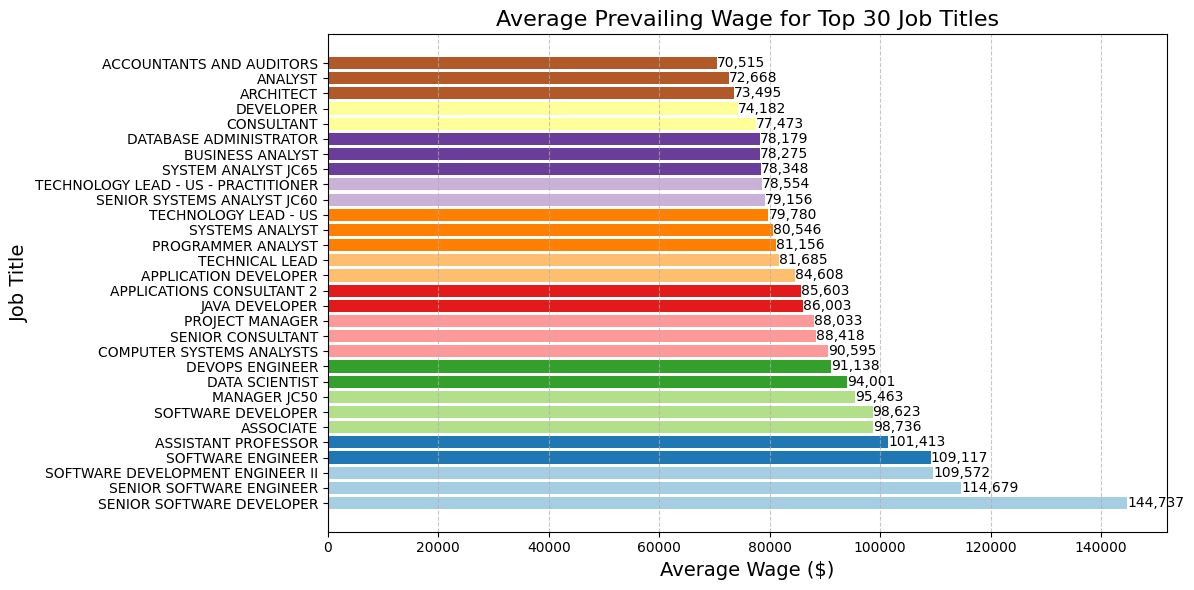

In [65]:

colors = plt.cm.Paired(np.linspace(0, 1, len(avg_wage_top_jobs)))

plt.figure(figsize=(12, 6))

# plot a bar grqph
bars = plt.barh(avg_wage_top_jobs['JOB_TITLE'], avg_wage_top_jobs['PREVAILING_WAGE_1'], color=colors)

plt.title('Average Prevailing Wage for Top 30 Job Titles', fontsize=16)
plt.xlabel('Average Wage ($)', fontsize=14)
plt.ylabel('Job Title', fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)


for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, f'{int(xval):,}', va='center')

plt.tight_layout()
plt.show()


                                   EMPLOYER_NAME  PREVAILING_WAGE_1
9                                 FACEBOOK, INC.      138336.737704
10                                    GOOGLE LLC      132966.883929
3                                     APPLE INC.      132126.881472
23                          SALESFORCE.COM, INC.      126336.701927
27                       UBER TECHNOLOGIES, INC.      115727.113518
19                         MICROSOFT CORPORATION      111856.927463
15                             INTEL CORPORATION      103777.070327
2                      AMAZON.COM SERVICES, INC.      103617.607735
16                          JPMORGAN CHASE & CO.      101983.818757
28                     WAL-MART ASSOCIATES, INC.       98310.978972
1                      AMAZON WEB SERVICES, INC.       97852.190482
22                    RANDSTAD TECHNOLOGIES, LLC       97651.297573
21  PRICEWATERHOUSECOOPERS ADVISORY SERVICES LLC       92269.090278
12                               IBM CORPORATION

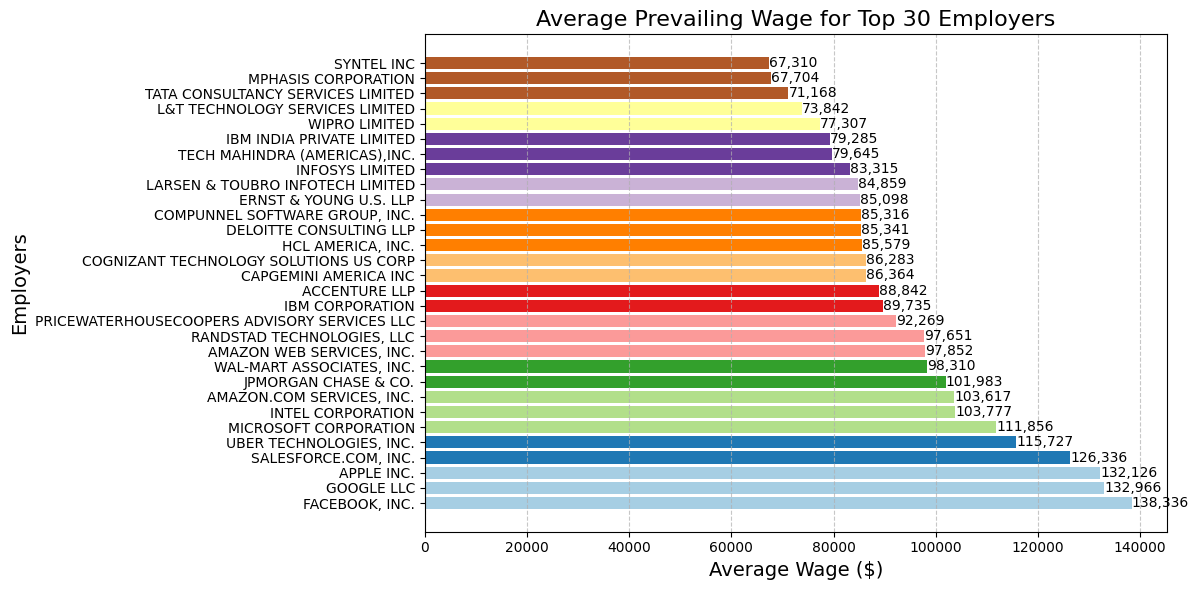

In [66]:

# Filter the wage_df DataFrame for the top employers
filtered_wage_df2 = wage_df[wage_df['EMPLOYER_NAME'].isin(top_employers.index)]

# Group by EMPLOYER_NAME and calculate the mean wage
avg_wage_top_employers = filtered_wage_df2.groupby('EMPLOYER_NAME')['PREVAILING_WAGE_1'].mean().reset_index()
avg_wage_top_employers = avg_wage_top_employers.sort_values(by='PREVAILING_WAGE_1', ascending=False)

print(avg_wage_top_employers)

colors = plt.cm.Paired(np.linspace(0, 1, len(avg_wage_top_employers)))

plt.figure(figsize=(12, 6))

# Create a bar plot
bars = plt.barh(avg_wage_top_employers['EMPLOYER_NAME'], avg_wage_top_employers['PREVAILING_WAGE_1'], color=colors)

plt.title('Average Prevailing Wage for Top 30 Employers', fontsize=16)
plt.xlabel('Average Wage ($)', fontsize=14)
plt.ylabel('Employers', fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_width()
    plt.text(yval, bar.get_y() + bar.get_height()/2, f'{int(yval):,}', va='center')

plt.tight_layout()
plt.show()



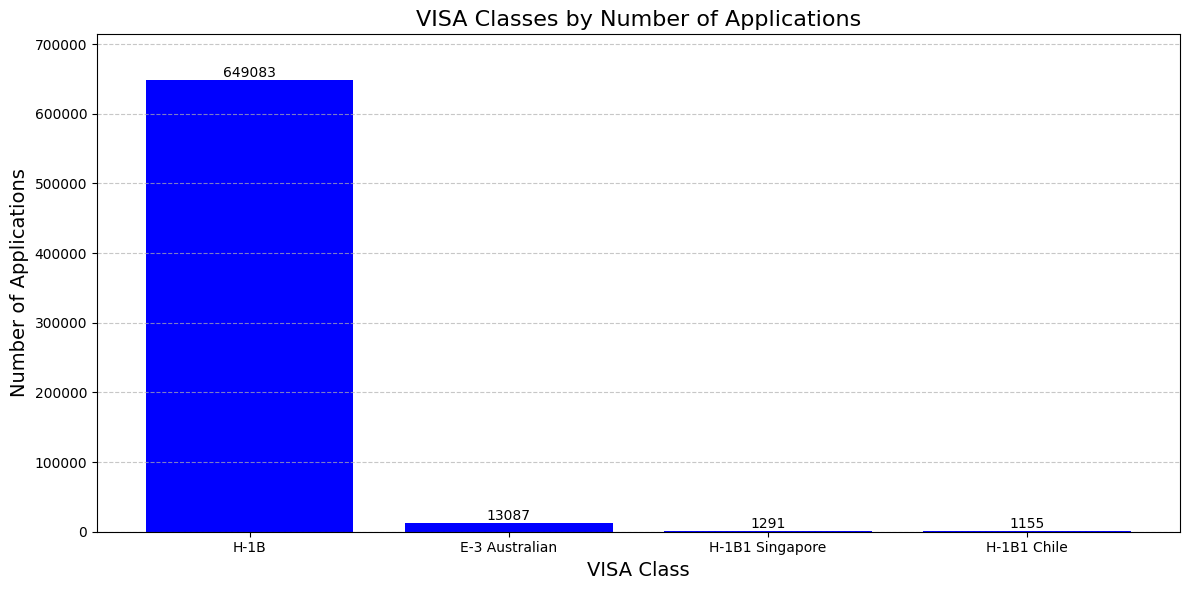

In [67]:
try:
    # Group by VISA_CLASS and count the number of applications
    visa_class_counts = new_df['VISA_CLASS'].value_counts()

    # Get the top 30 visa classes
    top_visa_classes = visa_class_counts.head(30)

    # Plotting the bar graph
    plt.figure(figsize=(12, 6))
    bars = plt.bar(top_visa_classes.index, top_visa_classes.values, color='blue')
    
    plt.xlabel('VISA Class', fontsize=14)
    plt.ylabel('Number of Applications', fontsize=14)
    plt.title('VISA Classes by Number of Applications', fontsize=16)
    plt.xticks(rotation=0)
    plt.ylim(0, top_visa_classes.max() * 1.1)

    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout() 
    plt.savefig('top_visa_classes_plot.png') 
    plt.show()  

except Exception as e:
    print(f"An error occurred while plotting: {e}")


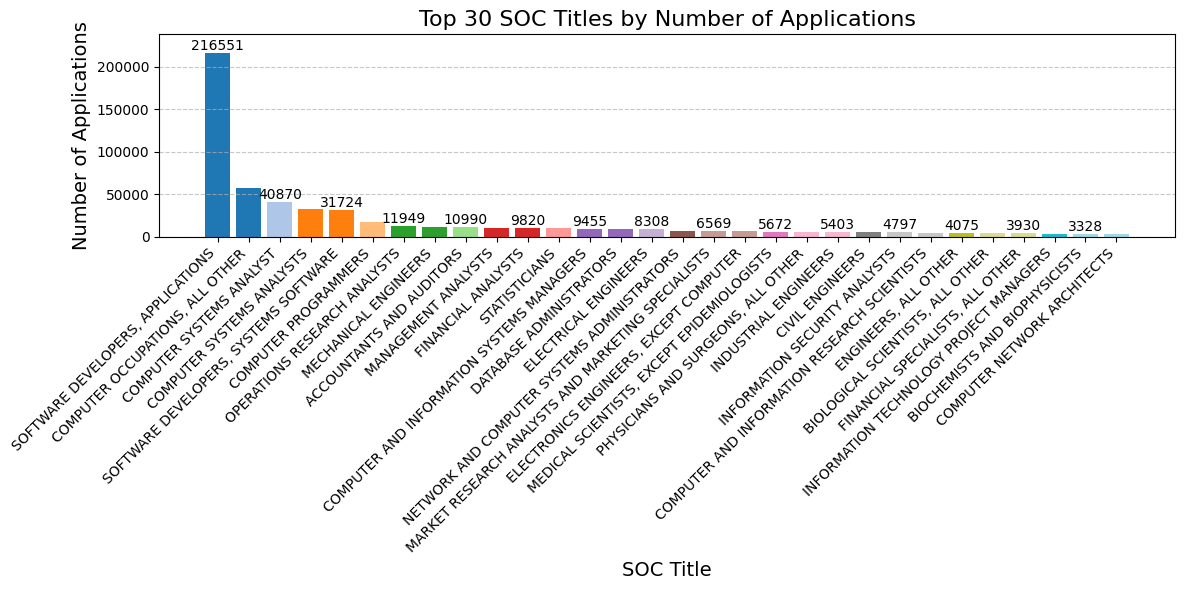

In [68]:

try:
    # Group by SOC_TITLE and count the number of applications
    soc_title_counts = new_df['SOC_TITLE'].value_counts()
    # Get the top 30 SOC_TITLE categories
    top_soc_titles = soc_title_counts.head(30)

    plt.figure(figsize=(12, 6))
    
    colors = plt.cm.get_cmap('tab20', len(top_soc_titles))

    # Create a bar plot
    bars = plt.bar(top_soc_titles.index, top_soc_titles.values, color=colors(np.arange(len(top_soc_titles))))
    
    plt.xlabel('SOC Title', fontsize=14)
    plt.ylabel('Number of Applications', fontsize=14)
    plt.title('Top 30 SOC Titles by Number of Applications', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, top_soc_titles.max() * 1.1) 

    count = 0
    for bar in bars:
        if count % 2 == 0:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')
        count+=1
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)

  
    plt.tight_layout()  
    plt.savefig('top_soc_titles_plot.png')
    plt.show()  
    
except Exception as e:
    print(f"An error occurred while plotting: {e}")


                                            SOC_TITLE  PREVAILING_WAGE_1
5           COMPUTER AND INFORMATION SYSTEMS MANAGERS      175383.009944
26                 PHYSICIANS AND SURGEONS, ALL OTHER      170658.002905
18                      INFORMATION SECURITY ANALYSTS      118022.723974
4        COMPUTER AND INFORMATION RESEARCH SCIENTISTS      112604.354324
12                               ELECTRICAL ENGINEERS      110569.611795
27                  SOFTWARE DEVELOPERS, APPLICATIONS      108790.923358
28              SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE      108408.829136
17                               INDUSTRIAL ENGINEERS      107695.018809
13             ELECTRONICS ENGINEERS, EXCEPT COMPUTER      104135.519764
6                         COMPUTER NETWORK ARCHITECTS       99050.369594
22                               MECHANICAL ENGINEERS       97149.377499
15                                 FINANCIAL ANALYSTS       94111.790115
20                                MANAGEMENT ANALYS

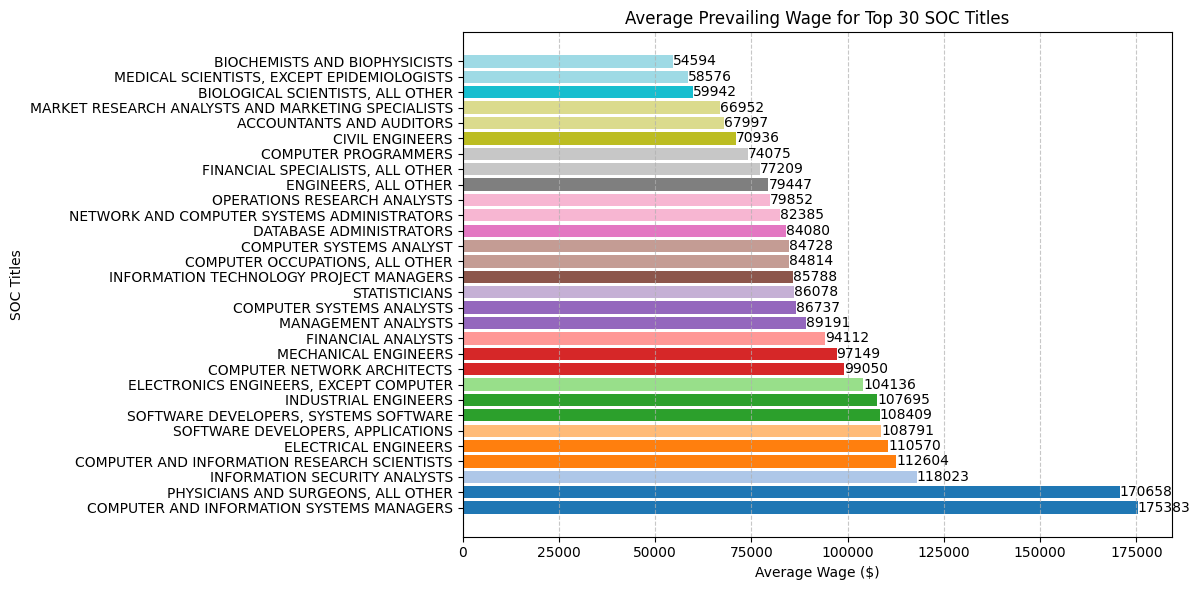

In [69]:

# Filter the wage_df DataFrame for the top jobs
filtered_wage_df3 = wage_df[wage_df['SOC_TITLE'].isin(top_soc_titles.index)]

# Group by JOB_TITLE and calculate the mean wage
avg_wage_top_soc_titles = filtered_wage_df3.groupby('SOC_TITLE')['PREVAILING_WAGE_1'].mean().reset_index()
avg_wage_top_soc_titles = avg_wage_top_soc_titles.sort_values(by='PREVAILING_WAGE_1', ascending=False)

print(avg_wage_top_soc_titles)

plt.figure(figsize=(12, 6))

colors = plt.cm.get_cmap('tab20', len(avg_wage_top_soc_titles))

# Create a horizontal bar plot
bars = plt.barh(avg_wage_top_soc_titles['SOC_TITLE'], avg_wage_top_soc_titles['PREVAILING_WAGE_1'], color=colors(np.arange(len(avg_wage_top_soc_titles))))

plt.title('Average Prevailing Wage for Top 30 SOC Titles')
plt.xlabel('Average Wage ($)')
plt.ylabel('SOC Titles')

plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.0f}', va='center', ha='left')

plt.tight_layout()
plt.show()


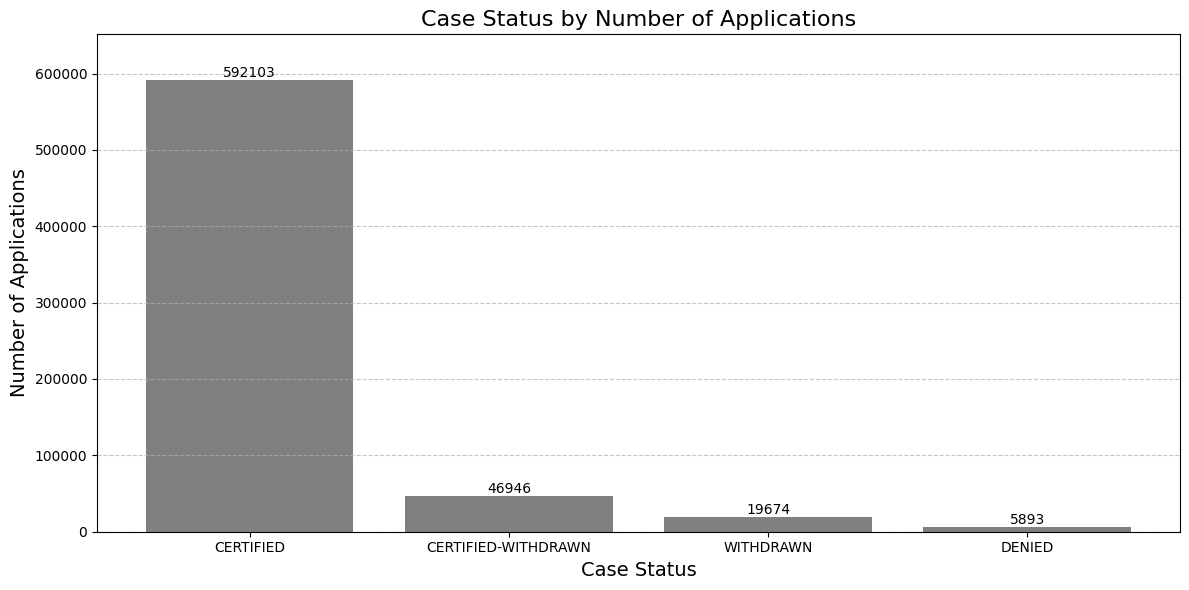

In [70]:

try:
    # Group by CASE_STATUS and count the number of applications
    case_status_counts = new_df['CASE_STATUS'].value_counts()

    # Plotting the bar graph
    plt.figure(figsize=(12, 6))
    bars = plt.bar(case_status_counts.index, case_status_counts.values, color='gray')
    
    plt.xlabel('Case Status', fontsize=14)
    plt.ylabel('Number of Applications', fontsize=14)
    plt.title('Case Status by Number of Applications', fontsize=16)
    plt.xticks(rotation=0)
    plt.ylim(0, case_status_counts.max() * 1.1)  

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

    plt.grid(axis='y', linestyle='--', alpha=0.7)

    
    plt.tight_layout() 
    plt.savefig('case_status_plot.png')  
    plt.show()  

except Exception as e:
    print(f"An error occurred while plotting: {e}")


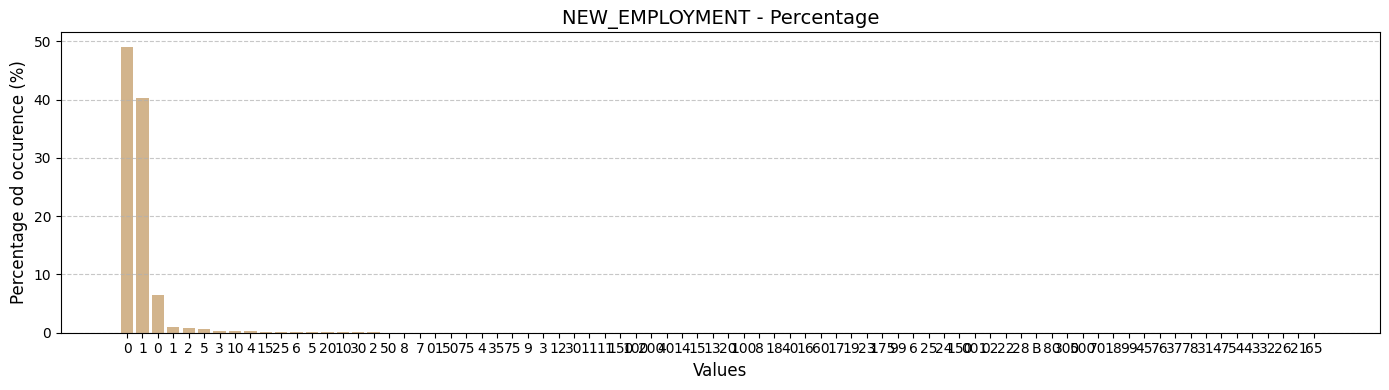

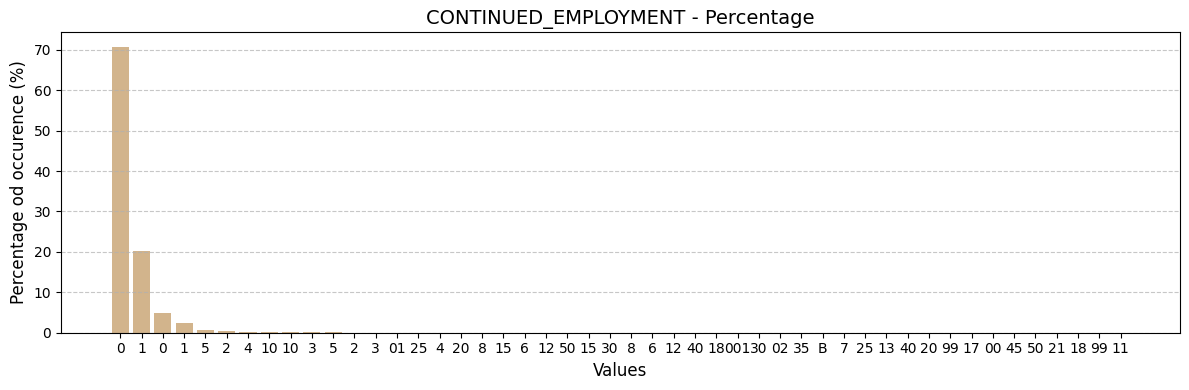

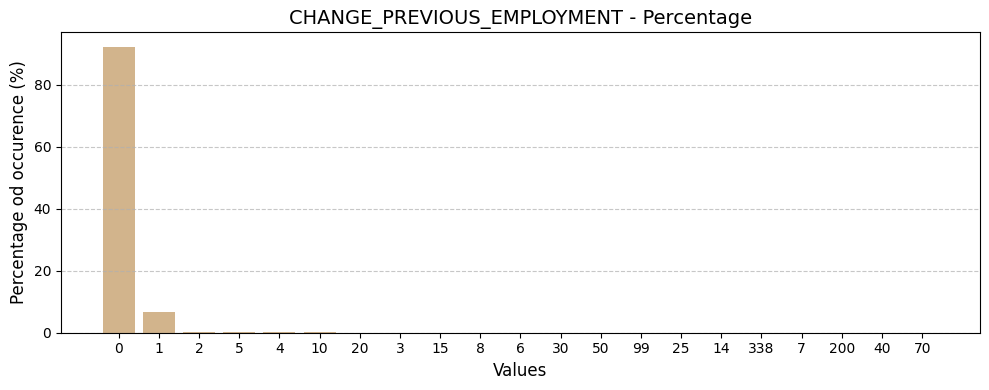

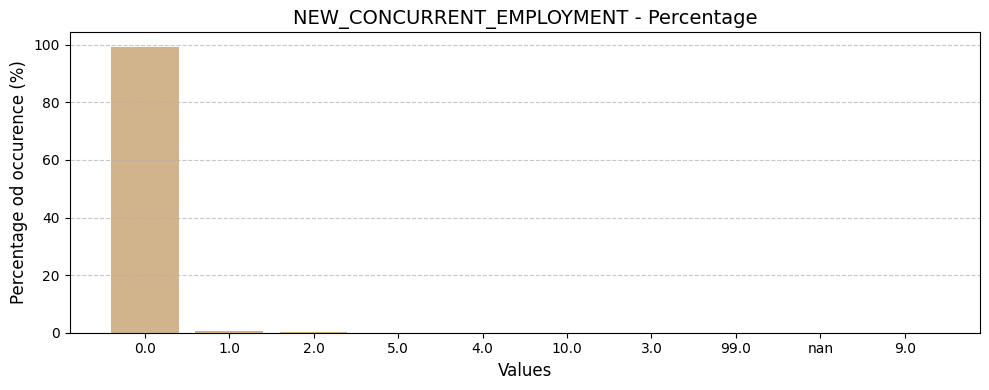

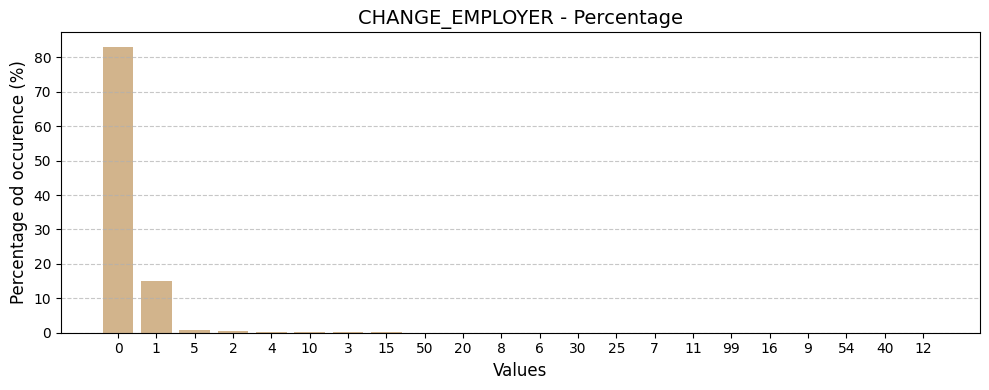

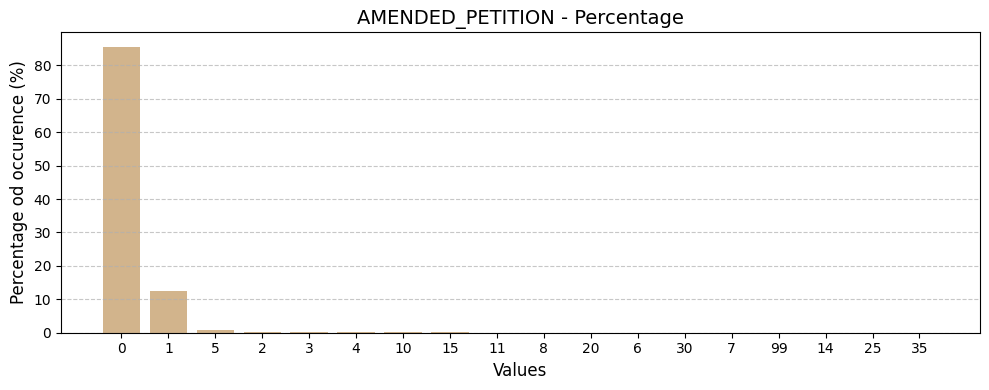

In [71]:

# Specify the columns to check
columns_to_check = [
    'NEW_EMPLOYMENT',
    'CONTINUED_EMPLOYMENT',
    'CHANGE_PREVIOUS_EMPLOYMENT',
    'NEW_CONCURRENT_EMPLOYMENT',
    'CHANGE_EMPLOYER',
    'AMENDED_PETITION'
]

# Loop through each column and create a separate graph
cnt = 0
for column in columns_to_check:
    value_counts = new_df[column].value_counts(dropna=False)
    total = len(new_df[column])
    percentages = (value_counts / total) * 100
    
    # Convert the index to a numerical range for the X-axis
    x_positions = np.arange(len(value_counts))
    # hardcode fig size according to the no. of distinct values
    width = 10
    if cnt == 0:
        width = 14
    if cnt == 1:
        width = 12
    cnt +=1
    
    # Create a bar plot
    plt.figure(figsize=(width, 4))
    bars = plt.bar(x_positions, percentages, color='tan')
  
    plt.title(f'{column} - Percentage', fontsize=14)
    plt.ylabel('Percentage od occurence (%)', fontsize=12)
    plt.xlabel('Values', fontsize=12)
    plt.xticks(x_positions, value_counts.index)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


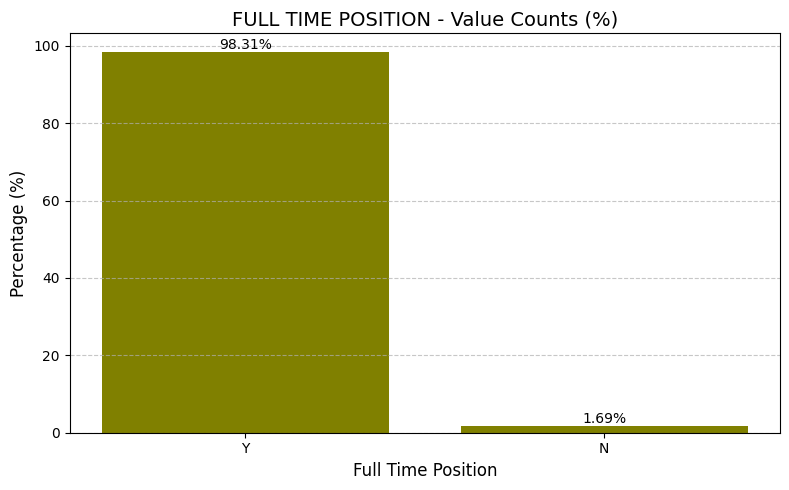

In [72]:

# Get value counts of FULL_TIME_POSITION
value_counts = new_df['FULL_TIME_POSITION'].value_counts(dropna=False)

# Calculate percentages
total = len(new_df['FULL_TIME_POSITION'])
percentages = (value_counts / total) * 100

x_positions = range(len(value_counts))

# Create a bar plot
plt.figure(figsize=(8, 5))  
bars = plt.bar(x_positions, percentages, color='olive')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}%', ha='center', va='bottom', fontsize=10)

plt.title('FULL TIME POSITION - Value Counts (%)', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Full Time Position', fontsize=12)

plt.xticks(x_positions, value_counts.index, rotation=0, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [73]:

state_df = wage_df.copy()

# Dictionary to map state abbreviations to full state names
state_hash = {
    "AK": "Alaska", "AL": "Alabama", "AR": "Arkansas", "AZ": "Arizona", "CA": "California", "CO": "Colorado",
    "CT": "Connecticut", "DC": "District of Columbia", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "IA": "Iowa", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "KS": "Kansas", "KY": "Kentucky",
    "LA": "Louisiana", "MA": "Massachusetts", "MD": "Maryland", "ME": "Maine", "MI": "Michigan", "MN": "Minnesota",
    "MO": "Missouri", "MS": "Mississippi", "MT": "Montana", "NC": "North Carolina", "ND": "North Dakota",
    "NE": "Nebraska", "NH": "New Hampshire", "NJ": "New Jersey", "NM": "New Mexico", "NV": "Nevada",
    "NY": "New York", "OH": "Ohio", "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "PR": "Puerto Rico",
    "RI": "Rhode Island", "SC": "South Carolina", "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas",
    "UT": "Utah", "VA": "Virginia", "VT": "Vermont", "WA": "Washington", "WI": "Wisconsin", 
    "WV": "West Virginia", "WY": "Wyoming"
}

# Map the WORKSITE_STATE to full state names
state_df['WORKSITE_STATE_FULL'] = state_df['WORKSITE_STATE_1'].map(lambda x: state_hash.get(x, x)).str.upper()
state_df = state_df.drop(columns=['WORKSITE_STATE_1'])
state_df.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,PERIOD_OF_EMPLOYMENT_START_DATE,...,PW_WAGE_LEVEL_1,PW_NON-OES_YEAR_1,WAGE_RATE_OF_PAY_FROM_2,WAGE_UNIT_OF_PAY_2,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,PUBLIC_DISCLOSURE,WORKSITE_STATE_FULL
6,I-200-18289-307616,WITHDRAWN,2018-10-19 13:49:03,2018-10-19 13:49:03,H-1B,DIRECTOR OF BUSINESS DEVELOPMENT,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,03/07/2019,...,Level II,NaN,100000.0,Year,N,N,NaN,NaN,PLACE OF BUSINESS,CALIFORNIA
7,I-200-19015-877040,WITHDRAWN,2019-01-15 15:12:53,2019-01-15 15:12:53,H-1B,HEAD OF BUSINESS DEVELOPMENT,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,2019-05-27 00:00:00,...,Level III,2019.0,NaN,NaN,N,N,NaN,NaN,PLACE OF BUSINESS,CALIFORNIA
8,I-200-19031-693896,WITHDRAWN,2019-01-31 16:32:00,2019-01-31 16:32:00,H-1B,"ACCOUNT DIRECTOR, SOCIAL MEDIA",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,2019-02-23 00:00:00,...,Level II,2018.0,NaN,NaN,N,N,NaN,NaN,PLACE OF EMPLOYMENT,CALIFORNIA
9,I-200-19056-659352,WITHDRAWN,2019-03-03 22:41:41,2019-03-03 22:41:41,H-1B,PRODUCT MARKETING MANAGER,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,2019-09-01 00:00:00,...,Level III,2018.0,NaN,NaN,N,N,NaN,NaN,PLACE OF BUSINESS,CALIFORNIA
10,I-200-19066-002723,WITHDRAWN,2019-03-07 11:23:22,2019-03-07 11:23:22,H-1B,ASSOCIATE ACCOUNT STRATEGY MANAGER,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,2019-09-06 00:00:00,...,Level I,2018.0,NaN,NaN,N,N,NaN,NaN,PLACE OF BUSINESS,ILLINOIS


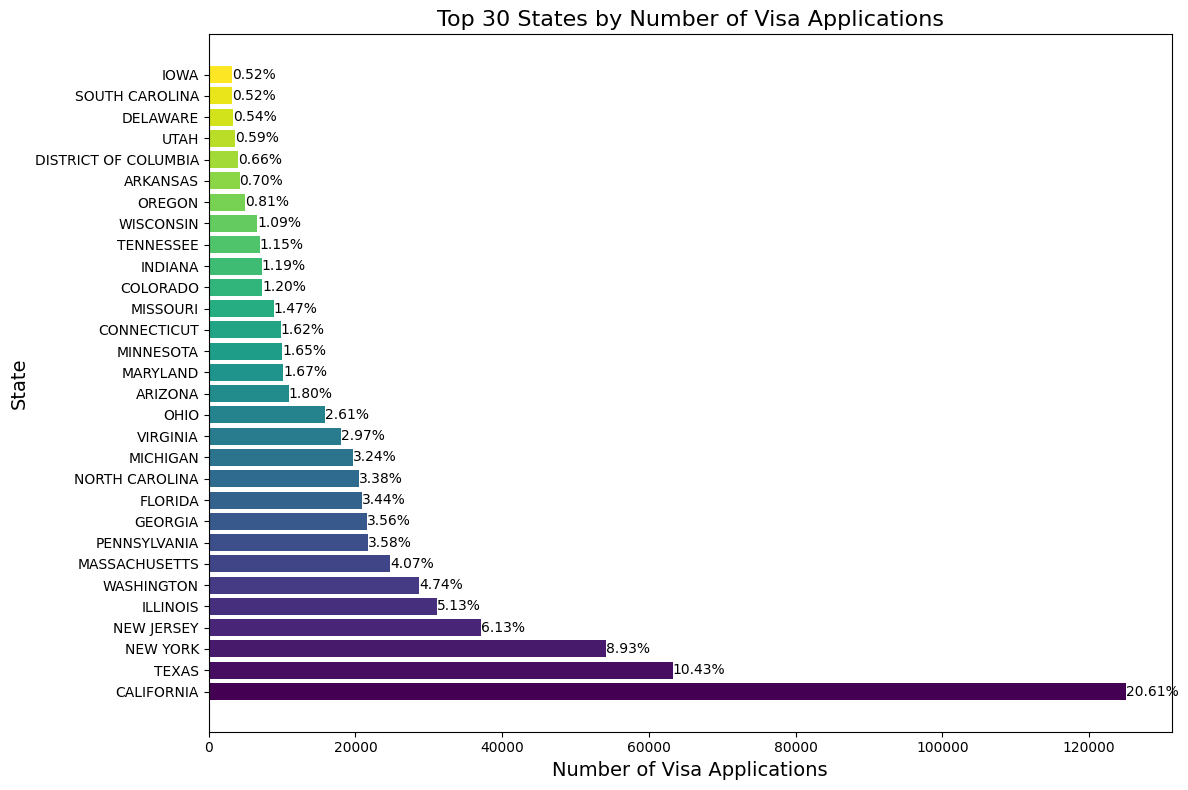

In [78]:

# Count the number of visa applications for each state
state_counts = state_df['WORKSITE_STATE_FULL'].value_counts()
# Select the top 30 states
top_30_states = state_counts.head(30)

total_applications = top_30_states.sum()

# Create a horizontal bar plot
plt.figure(figsize=(12, 8)) 
colors = plt.cm.viridis(np.linspace(0, 1, len(top_30_states))) 

bars = plt.barh(top_30_states.index, top_30_states.values, color=colors)

plt.xlabel('Number of Visa Applications', fontsize=14)
plt.ylabel('States', fontsize=14)
plt.title('Top 30 States by Number of Visa Applications', fontsize=16)

for bar in bars:
    percentage = (bar.get_width() / total_applications) * 100  
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{percentage:.2f}%', ha='left', va='center', fontsize=10)

plt.tight_layout() 
plt.show()


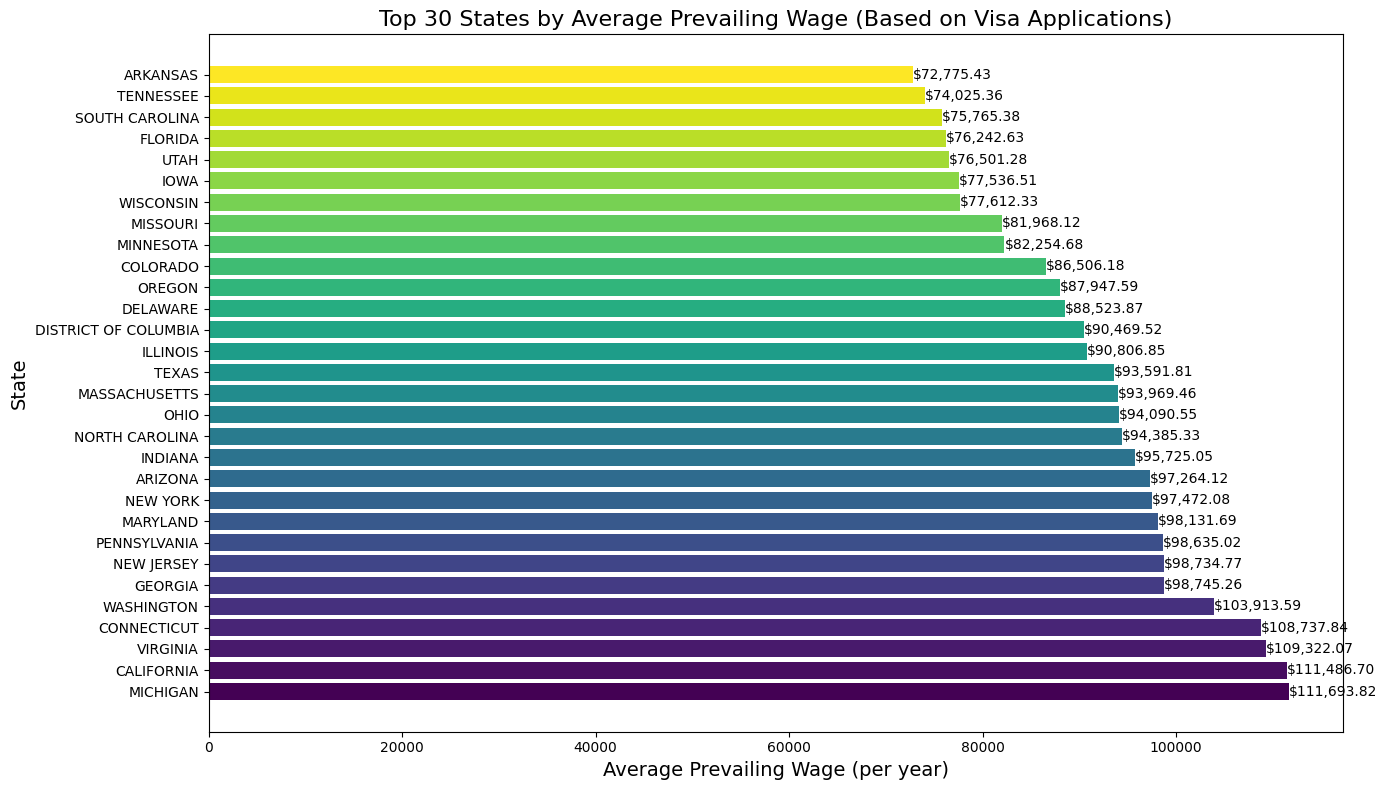

In [87]:

# Count the number of visa applications for each state
state_counts = state_df['WORKSITE_STATE_FULL'].value_counts()
# Select the top 30 states based on visa applications
top_30_states = state_counts.head(30).index
# Calculate the average PREVAILING_WAGE_1 for the top 30 states
average_wages_top_30 = state_df[state_df['WORKSITE_STATE_FULL'].isin(top_30_states)]\
    .groupby('WORKSITE_STATE_FULL')['PREVAILING_WAGE_1'].mean()


average_wages_top_30 = average_wages_top_30.reset_index()
average_wages_top_30.columns = ['WORKSITE_STATE_FULL', 'Average_Prevailing_Wage']
average_wages_top_30.sort_values(by='Average_Prevailing_Wage', ascending=False, inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(14, 8))  
colors = plt.cm.viridis(np.linspace(0, 1, len(average_wages_top_30)))

bars = plt.barh(average_wages_top_30['WORKSITE_STATE_FULL'], average_wages_top_30['Average_Prevailing_Wage'], color=colors)

plt.xlabel('Average Prevailing Wage (per year)', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.title('Top 30 States by Average Prevailing Wage (Based on Visa Applications)', fontsize=16)


for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'${bar.get_width():,.2f}', ha='left', va='center', fontsize=10)


plt.tight_layout()  
plt.show()
